<a href="https://colab.research.google.com/github/prashu18400/Colab/blob/main/MAJOR_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download from Kaggle

In [1]:
import os

Go to account section in kaggle and create a new API.
It gives a json file,open that and enter your username and password given there

In [3]:
os.environ['KAGGLE_USERNAME'] = 'prashanthjuluru'
os.environ['KAGGLE_KEY'] = '029eb9a6cedf098bceb9d1eb890c3ca0'

In [4]:
!kaggle datasets download -d jangedoo/utkface-new

 98% 324M/331M [00:03<00:00, 104MB/s] 
100% 331M/331M [00:03<00:00, 112MB/s]


In [5]:
dataset = '/content/utkface-new.zip'

In [6]:
import zipfile
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall()
zip_ref.close()


# Data Preprocess


In [7]:
fldr = '/content/crop_part1'

In [8]:
files = os.listdir(fldr)

Adding all details to separate lists and are used in training and test data split by converting them to numpy arrays

In [ ]:
import cv2
ages = []
genders = []
images = []
for file in files:
  age=int(file.split('_')[0])
  gender=int(file.split('_')[1])
  total=fldr+'/'+file
  print(total)
  image=cv2.imread(total)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)


In [10]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

Import matplotlib and see the images that are cropped.

In [11]:
import matplotlib.pyplot as plt

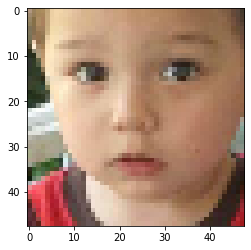

In [12]:
plt.imshow(images[10])

This shape can be used as parameters to the model that we define i.e Convolutional Neural Network

In [13]:
image.shape

(48, 48, 3)

As said convert those lists into numpy arrays and save them into a directory (in my case directory is 'output')

In [14]:
import numpy as np
images_f = np.array(images)
genders_f = np.array(genders)
ages_f = np.array(ages)

In [17]:
output_path = '/content/output/' #set the output path

In [18]:
np.save(output_path+'image.npy',images_f)
np.save(output_path+'gender.npy',genders_f)
np.save(output_path+'age.npy',ages_f)

# Dataset Information

In [19]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[4372 5407    1]


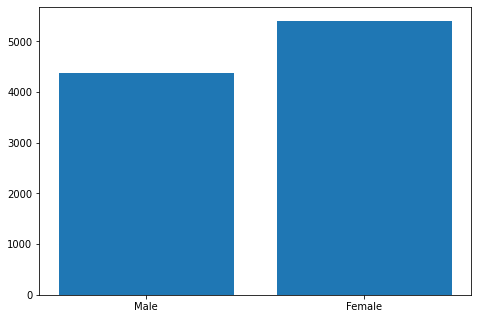

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [4372,5407]
ax.bar(gender,values)
plt.show()

In [21]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1112  475  284  260  180  114  126  236  159  140   63  106   75  137
  143  212  103  181   58  103  136  139   92  191  156  279  126  145
  150  109   97  141   46   87  121  112   94   91  136   85   56   84
   52   27   77   61   70   64   99  105   62  133  133  106   52  132
   60   96   59  137   50   76   47   29  113   54   47   58   45   53
   22   70   31   16   87   35   19   30   16   71   10   29    7   11
  130   23    4   17   16   56    1   13    3    3   16    2    2    1
    2]


In [22]:
val=values.tolist()
cnt=counts.tolist()

[]

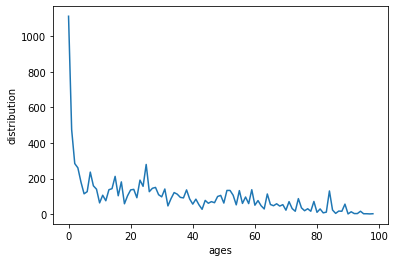

In [23]:
#age distribution
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.plot()

# Model definition


In [24]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [25]:
images_f_2=images_f/255
labels_f = np.array(labels)

In [26]:
images_f_2.shape

(9780, 48, 48, 3)

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [29]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]